# Econ PS6 

## 6.1 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
import scipy. integrate as intr
import pandas_datareader.data as web
import datetime
from scipy import optimize as opt
max_line_width=np.inf
import pprint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
start_date = datetime.datetime(1970, 10, 1)
end_date = datetime.datetime(2018, 7, 1)

In [3]:
RPCE = web.DataReader('PCECC96', 'fred', start_date, end_date)# Quarterly and Real
N_WIL = web.DataReader('WILL5000INDFC', 'fred', start_date, end_date)# Weekdays and Nominal
GDPDEF= web.DataReader('GDPDEF', 'fred', start_date, end_date)# Quarterly 
N_Rf = web.DataReader('TB3MS', 'fred', start_date, end_date) # Nominal and monthly
RPCE.tail(5)

,PCECC96
DATE,
2017-04-01,12515.860
2017-07-01,12584.906
2017-10-01,12706.369
2018-01-01,12722.839
2018-04-01,12847.820


In [4]:
N_Rf.tail(10)

,TB3MS
DATE,
2017-09-01,1.03
2017-10-01,1.07
2017-11-01,1.23
2017-12-01,1.32
2018-01-01,1.41
2018-02-01,1.57
2018-03-01,1.70
2018-04-01,1.76
2018-05-01,1.86


In [5]:
N_WIL.tail(10)

,WILL5000INDFC
DATE,
2018-06-18,130.88
2018-06-19,130.40
2018-06-20,130.75
2018-06-21,129.83
2018-06-22,130.02
2018-06-25,128.13
2018-06-26,128.50
2018-06-27,127.23
2018-06-28,127.99


In [6]:
GDPDEF.tail(10)

,GDPDEF
DATE,
2016-01-01,105.055
2016-04-01,105.778
2016-07-01,106.172
2016-10-01,106.720
2017-01-01,107.275
2017-04-01,107.580
2017-07-01,108.097
2017-10-01,108.824
2018-01-01,109.371


In [7]:
N_Rf.tail(10)

,TB3MS
DATE,
2017-09-01,1.03
2017-10-01,1.07
2017-11-01,1.23
2017-12-01,1.32
2018-01-01,1.41
2018-02-01,1.57
2018-03-01,1.70
2018-04-01,1.76
2018-05-01,1.86


In [8]:
N_Rf = N_Rf .fillna(method="ffill")
N_WIL= N_WIL.fillna(method="ffill")
N_Rf = N_Rf.resample('QS').first()
N_WIL = N_WIL.resample('QS').first()


lucas = pd.DataFrame(columns=['C', 'R', 'Rf', 'deflator'], index = RPCE.index)
lucas['C'] = RPCE
lucas['R'] = N_WIL
lucas['Rf'] = N_Rf / 100 + 1
lucas['deflator'] = (GDPDEF / 100)
lucas['deflator'] /= lucas['deflator'][0]
lucas['R'] = lucas['R'] / (lucas['deflator'])
# lucas['Rf'] = lucas['Rf'] / (lucas['deflator'])
lucas['R'] = lucas['R'] / lucas['R'].shift(1)

lucas.dropna(axis=0, inplace=True)
lucas.sample(10)

,C,R,Rf,deflator
DATE,,,,
1982-04-01,4334.262,0.910306,1.1270,2.213185
1998-01-01,7633.895,1.008879,1.0504,3.397398
1984-01-01,4770.457,0.984485,1.0890,2.367746
2004-10-01,9877.416,0.999664,1.0176,3.886108
1987-10-01,5555.451,1.071969,1.0613,2.615841
2001-07-01,8848.300,1.093992,1.0351,3.627312
2012-10-01,11056.852,1.053842,1.0010,4.567329
1995-01-01,6822.519,0.989483,1.0571,3.234675
2004-01-01,9604.507,1.092320,1.0088,3.800326


## 6.1.1

In [9]:
def objective_1(γ, *args):
    lucas, β = args
    R_1 = lucas['R']
    MU = lucas['C'] ** (-γ)
    m_1 = β * (MU / MU.shift(1))
    return 1 - m_1.cov(R_1) - m_1.mean() * R_1.mean()

In [10]:
β = 0.99
result_1 = opt.root(objective_1, 3.0,method = 'broyden1', args=(lucas, β))
result_1

     fun: array([5.08961637e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 4
  status: 1
 success: True
       x: array(1.35556038)

## 6.1.2

   $\gamma =0 $ represents a risk neutral agent. Whereas $\gamma = 1$ represents a log utility function where substitution and income effect just cancel each other,but it still shows risk aversion. Higher values than that show higher risk aversion.

## 6.1.3 

In [11]:
def objective_2(γ, *args):
    lucas, β = args
    rf = lucas['Rf']
    MU = lucas['C'] ** (-γ)
    m_1 = β * (MU/ MU.shift(1))
    errors = np.sum((rf - (1 / m_1))**2)
    return errors

In [12]:
β = 0.99
result_2 = opt.minimize(objective_2, 2.0,method = 'L-BFGS-B', args=(lucas, β), tol = 1e-14)
result_2

      fun: 0.33776069415501186
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.88578059e-08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 5
   status: 0
  success: True
        x: array([2.71972693])

We have calculated this value using risk free rate parameter. This value definitely needs to be much higher than the value calculated using stock market returns as T-Bills will attract highly risk averse individuals who are just trying to protect their present value of the consumption.

## 6.1.4

In [13]:
def objective_3(params, args):
    γ, β = params
    lucas = args
    moments = np.empty(2)
    W = np.eye(2)
    R_1 = lucas['R']
    MU = lucas['C'] ** (-γ)
    m_1 = β * (MU / MU.shift(1))
    m_1  = m_1[1:]
    R_1 = R_1[1:]
    rf = lucas['Rf']
    rf = rf[1:]
    
    moments[0] = (1 - m_1.cov(R_1) - m_1.mean() * R_1.mean())
    moments[1]=  np.sum((rf - (1 / m_1)))
    
    return moments.T @ W @ moments

guess = np.array([2.25, .99])
result_3 = opt.minimize(objective_3, guess ,method = 'L-BFGS-B', args=(lucas), bounds=((1e-4, None), (1e-4, 1)), tol = 1e-14)
result_3


      fun: 0.0006323182709724359
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.95617177e-06, 2.41425586e-05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 138
      nit: 4
   status: 2
  success: False
        x: array([2.43770492, 0.97282589])

My results are sensitive to the initial condition. However the $\gamma$ value should lie between the values calculated in the second and third part of the problem. The intuition is that now we have pooled the preferences of relatively risk takin/risk averse market participants. Or for the same investor its risk taking/risk averse portion of the portfolio with risk averse/risk taking part. 

Text(0.5,1,'Value of GMM objective function')

Text(0.5,0,'$\\gamma$')

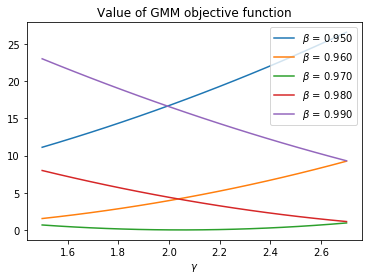

In [14]:
n = 20
N = 5
γ_grid = np.linspace(1.5, 2.7, n)
β_grid = np.linspace(0.95, 0.99, N)
args =lucas
gmm_values = np.empty((n, N))
for i in range(n):
    for j in range(N):
        params =  np.array([γ_grid[i], β_grid[j]])
        gmm_values[i, j] = objective_3(params,args)
        
for j in range(N):
    plt.plot(γ_grid, gmm_values[:, j], label=rf'$\beta$ = {β_grid[j]:.3f}')
plt.title('Value of GMM objective function')
plt.xlabel('$\gamma$')
plt.legend()
plt.show()

# 6.2

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pprint
import scipy.stats as sts
import pickle
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime

In [16]:
AAPL = pickle.load(open("AAPL.txt",'rb'))
C = pickle.load(open("C.txt",'rb'))
THO = pickle.load(open("THO.txt",'rb'))
GBX = pickle.load(open("GBX.txt",'rb'))
SPY = pickle.load(open("SPY.txt",'rb'))

In [57]:
class Orderbook:
    '''
    The orderbook class. Initialized with a single element of the raw data files.
    Methods:
        __init__: accepts the raw data and a name and cleans it up - the final form 
            is a dataframe with columns for price, quantity at that price, cumulative 
            quantity, and buy/sell side.
        estimate: estimates parameters γ and β for equation (10). I have two different 
            estimators, which limit the regression to subsets of the data only inculding bids
            within 10 pct and 5 pct of the observations
        plot: plots the orderbook with the two estimatorsoverlaid in the 15 pct region
    '''
    
    def __init__(self, data, name):
        self.ticker = data[0]
        self.name = name
        
        #Converting raw data into prices and quantities
        df = pd.DataFrame.from_dict(data[1], orient='index')
        df = df.sort_index()
        df = df.reset_index()
        df.columns = ['Price', 'Quantity', 'Side', 'X','Y']
        df = df.drop(['X', 'Y'], axis = 1)
        
        #Get cumulative quantity - setting 0 to where buy meets sell
        df['Cumulative_Quantity'] = df['Quantity'].cumsum()
        Qmkt = np.max(df['Cumulative_Quantity'][df['Side']== 'B'])
        Pmkt = df['Price'][(df['Cumulative_Quantity'][df['Side']== 'B']).idxmax()]
        df['Cumulative_Quantity'] = df['Cumulative_Quantity'] - Qmkt
        # Save Price as attribute
        self.Pmkt = Pmkt
        
        #Restrict to region where most of the quantity moves
        
        #Save data and some subsets as attributes
        self.data = df
        self.data10P = df[(df.Price >= self.Pmkt*.90) 
                               & (df.Price <= self.Pmkt*1.10)]
        self.data05P = df[(df.Price >= self.Pmkt*.95) 
                               & (df.Price <= self.Pmkt*1.05)]

        
    def estimate(self, orderbook):
        result = smf.ols(formula='Cumulative_Quantity ~ Price', data=orderbook).fit()
        gamma, beta = result.params[0], result.params[1]
        return result.params
    
    def plot(self):
        #Plot orderbook
        plt.plot(self.data10P['Price'], self.data10P['Cumulative_Quantity'],\
                 label = 'Orderbook')
        
        #Get 2 different estimators
        
        result05P = self.estimate(self.data05P)
        gamma05P, beta05P = result05P[0], result05P[1]
        est05P = gamma05P + beta05P * self.data10P.Price
        
        result10P = self.estimate(self.data10P)
        gamma10P, beta10P = result10P[0], result10P[1]
        est10P = gamma10P + beta10P * self.data10P.Price
        
        #Plot estimators
        plt.plot(self.data10P.Price, est10P, label = f'Approximation within 10% of P \n \
 \n γ = {np.round(gamma10P)} \n β = {np.round(beta10P)}')
        plt.plot(self.data10P.Price, est05P, label = f'Approximation within 5% of P \n γ = {np.round(gamma05P)} \
\n β = {np.round(beta05P)}')
        plt.legend(loc = 'center left', bbox_to_anchor = (0, .8))
        plt.title(f'Order Book of {self.name} at time {self.ticker}')
        plt.xlabel('Price')
        plt.ylabel('Cumulative Quantity')
        plt.xlim(self.data10P.Price.min(), self.data10P.Price.max())
        plt.ylim(self.data10P.Cumulative_Quantity.min() * 1.1, self.data10P.Cumulative_Quantity.max() * 1.1)

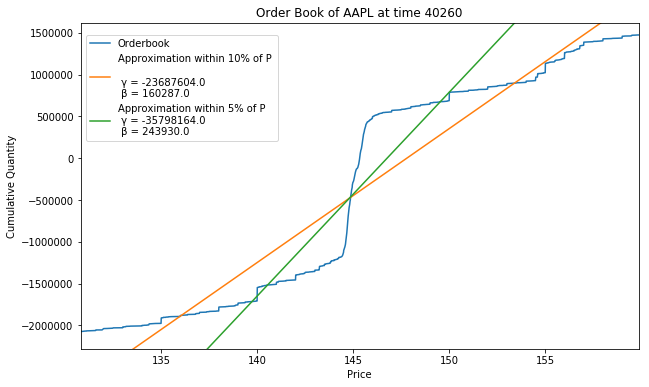

In [45]:
book = Orderbook(AAPL[100], 'AAPL')
fig = plt.subplots(figsize = (10, 6))
book.plot()

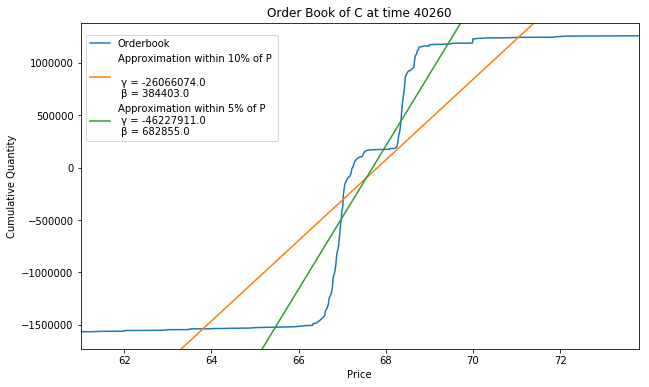

In [46]:
book = Orderbook(C[100], 'C')
fig = plt.subplots(figsize = (10, 6))
book.plot()

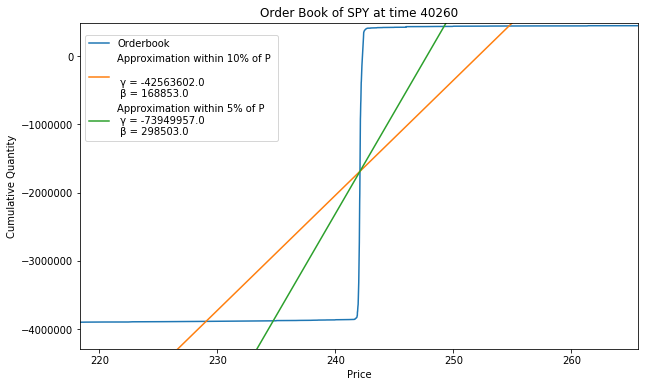

In [47]:
book = Orderbook(SPY[100], 'SPY')
fig = plt.subplots(figsize = (10, 6))
book.plot()

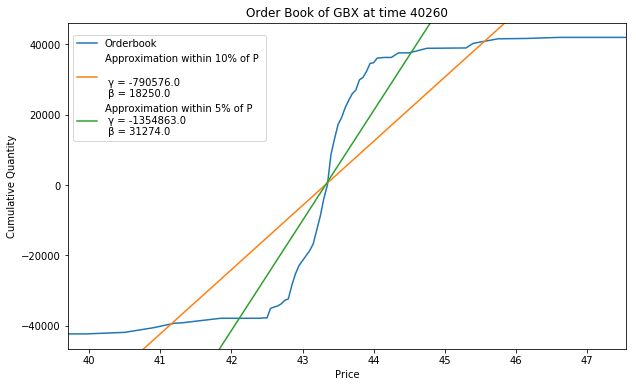

In [48]:
book = Orderbook(GBX[100], 'GBX')
fig = plt.subplots(figsize = (10, 6))
book.plot()

In [67]:
class Assetday():
    '''
    This class is initialized with a raw data dictionary from the NASDAQ ITCH files,
    cleans the data into individual data-frames and is equipped with some nice plotting 
    methods which span the whole day.
    Methods:
        init:
            initializes data series for the ticker. Accepts raw data and a name which is 
            printed on the graphs. Create series for times, market price, and ratio/imputed 
            price for each estimate. 
        signoiseplot:
            Plots time series of noise/signal estimators for each estimator
        priceestplot: 
            Plots market price and price estimators over time
    '''
    
    def __init__(self, rawdata, name):
        #Initialize attributes
        self.prices = []
        self.times = []
        self.ratio05Ps = []
        self.ratio10Ps = []
        self.Pimputed05s = []
        self.Pimputed10s = []
        self.name = name
        for i in range(len(rawdata)):
            book = Orderbook(rawdata[i], name)
            
            #Get ratios and imputed prices
            result05P = book.estimate(book.data05P)
            gamma05P, beta05P = result05P[0], result05P[1]
            Pimputed05 = -gamma05P / beta05P 
            
            result10P = book.estimate(book.data10P)
            gamma10P, beta10P = result10P[0], result10P[1]
            Pimputed10 = -gamma10P / beta10P
            
            self.prices.append(book.Pmkt)
            self.times.append(book.ticker)
            self.ratio05Ps.append(beta05P)
            self.ratio10Ps.append(beta10P)
            self.Pimputed05s.append(Pimputed05)
            self.Pimputed10s.append(Pimputed10)
            
    def signoiseplot(self):
        fig = plt.subplots(figsize = (10, 6))
        plt.plot(self.times, self.ratio05Ps, label = 'Approximation Within 5 Pct of P')
        plt.plot(self.times, self.ratio10Ps, label = 'Approximation Within 10 Pct of P')
        plt.xlabel('Time (seconds after midnight)')
        plt.ylabel('Noise/Signal Ratio')
        plt.legend(loc = 'center left', bbox_to_anchor = (0, .9))
        plt.title(f'Market Maker Beliefs About Composition of Investor Pool Over Time for {self.name}')
        
    def priceestplot(self):
        fig = plt.subplots(figsize = (10, 6))
        plt.plot(self.times, self.prices, label = 'Market Price')
        plt.plot(self.times, self.Pimputed10s, label = 'Imputed price - Within 10% of P')
        plt.plot(self.times, self.Pimputed05s, label = 'Imputed price - Within 5% of P')
        plt.xlabel('Time (seconds after midnight)')
        plt.ylabel('Price (USD)')
        plt.legend(loc = 'center left', bbox_to_anchor = (0, .9))
        plt.title(f'Comparison of Model-Imputed price and actual price for {self.name}')

In [68]:
AAPLAD = Assetday(AAPL, 'AAPL')
CAD = Assetday(C, 'C')
SPYAD = Assetday(SPY, 'SPY')
GBXAD = Assetday(GBX, 'GBX')
THOAD = Assetday(THO, 'THO')

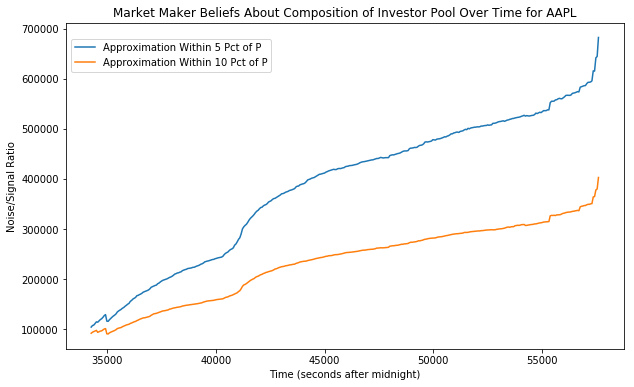

In [70]:
AAPLAD.signoiseplot()

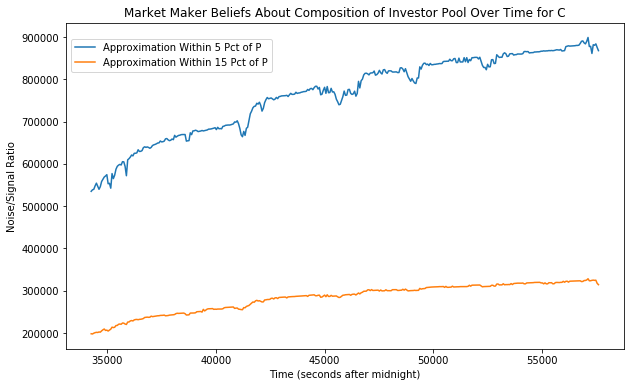

In [84]:
CAD.signoiseplot()

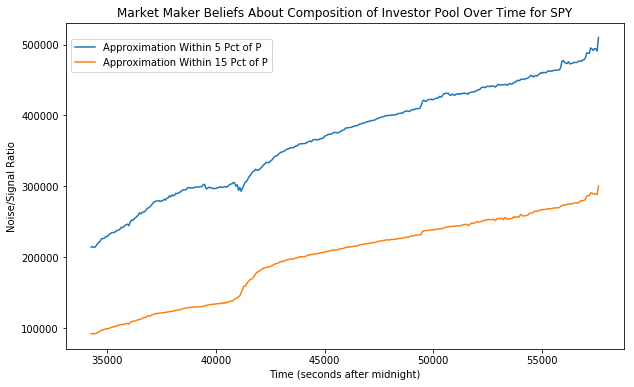

In [85]:
SPYAD.signoiseplot()

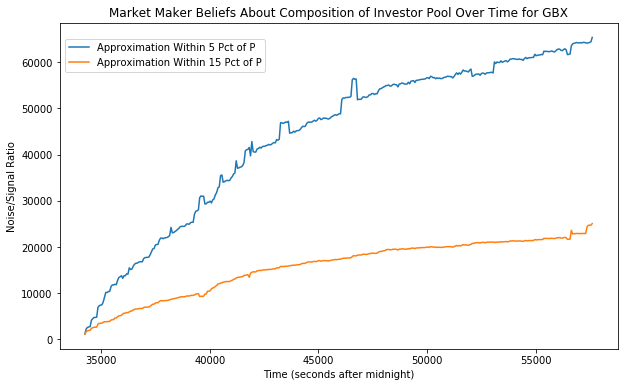

In [86]:
GBXAD.signoiseplot()

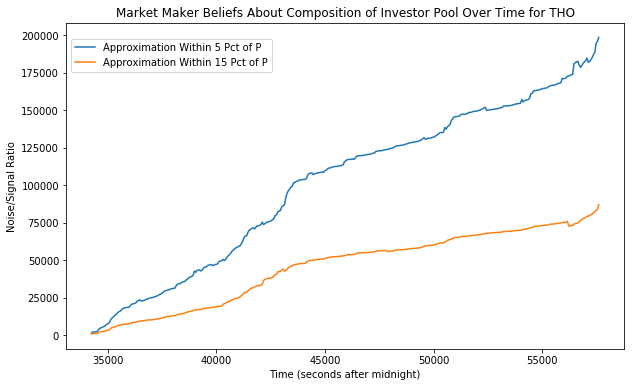

In [87]:
THOAD.signoiseplot()

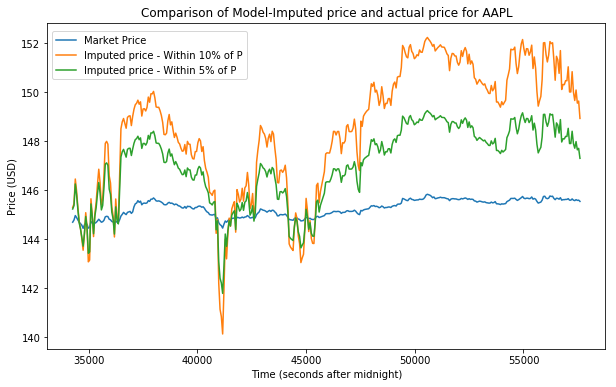

In [75]:
AAPLAD.priceestplot()

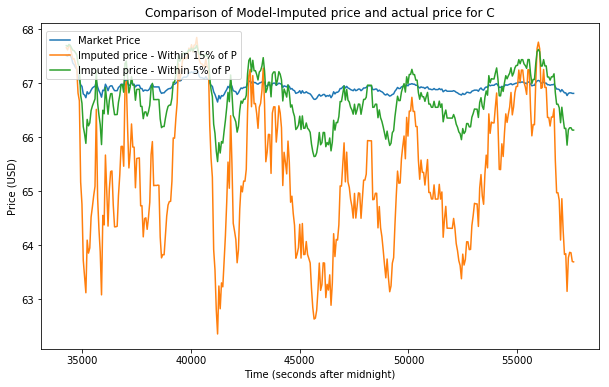

In [76]:
CAD.priceestplot()

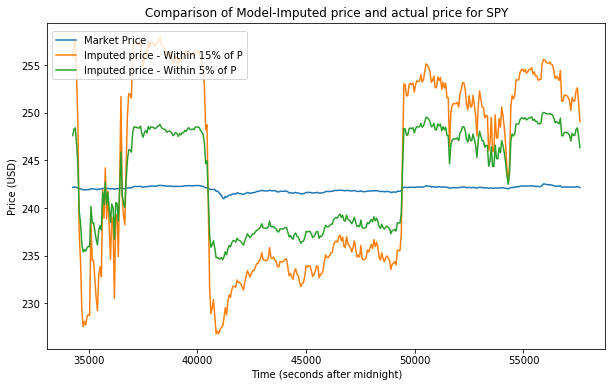

In [77]:
SPYAD.priceestplot()

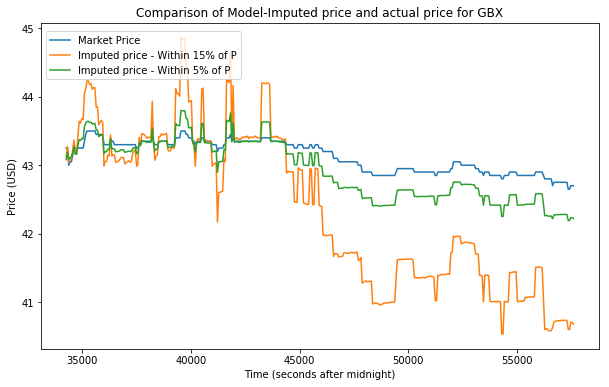

In [78]:
GBXAD.priceestplot()

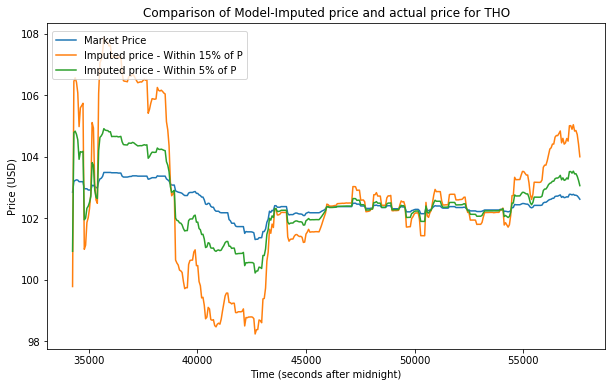

In [79]:
THOAD.priceestplot()